<h2>EDA

separate dataset, 20% to validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("C:/Users/DELL/Downloads/archive (1)/online_shoppers_intention.csv")

train, validation = train_test_split(all_data, test_size=0.2, random_state=42)

sizes of sets:

In [5]:
train.shape, validation.shape

((9864, 18), (2466, 18))

In [3]:
train.to_csv("C:/Users/DELL/Downloads/data.csv",index=False)
validation.to_csv("C:/Users/DELL/Downloads/val.csv",index=False)

In [2]:
data=pd.read_csv('C:/Users/DELL/Downloads/data.csv')
#train, test = train_test_split(
#    data, test_size=0.3, random_state=42
#)

<h3>attributes

In [6]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,Mar,2,6,1,1,Returning_Visitor,False,False
1,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,Nov,2,2,3,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
3,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,Sep,2,2,8,2,New_Visitor,False,False
4,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,Nov,3,2,7,8,New_Visitor,True,False


data consists of 18 columns, 9 num 5 cat 2 bools and 2 objects

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   object 
 11  OperatingSystems         9864 non-null   int64  
 12  Browser                  9864 non-null   int64  
 13  Region                   9864 non-null   int64  
 14  TrafficType             

encoding Month, VisitorType, Weekend, Revenue

In [3]:
data_encoded=data.copy()
month_to_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
data_encoded['Month'] = data_encoded['Month'].map(month_to_num)
data_encoded.dropna(subset=['Month'], inplace=True)
data_encoded['Month'] = data_encoded['Month'].astype(int)

In [4]:
data_encoded['Month'].unique()

array([ 3, 11,  9, 10,  5, 12,  6,  8,  7,  2])

In [125]:
data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [5]:
visitor_to_num = {
    'Returning_Visitor': 2,
    'New_Visitor': 1,
    'Other': 0
}
data_encoded['VisitorType'] = data_encoded['VisitorType'].map(visitor_to_num)
data_encoded.dropna(subset=['VisitorType'], inplace=True)
data_encoded['VisitorType'] = data_encoded['VisitorType'].astype(int)

In [6]:
from sklearn.calibration import LabelEncoder

data_encoded['Weekend']=LabelEncoder().fit_transform(data_encoded['Weekend'])

In [7]:
data_encoded['Revenue']=LabelEncoder().fit_transform(data_encoded['Revenue'])

In [9]:
data_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,3,2,6,1,1,2,0,0
1,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,11,2,2,3,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,3,2,2,1,1,2,0,0
3,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,9,2,2,8,2,1,0,0
4,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,11,3,2,7,8,1,1,0


In [10]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   int32  
 11  OperatingSystems         9864 non-null   int64  
 12  Browser                  9864 non-null   int64  
 13  Region                   9864 non-null   int64  
 14  TrafficType             

In [11]:
data_encoded.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000
mean,2.302818,81.107226,0.503447,34.062159,31.736922,1197.331019,0.021659,0.042613,5.832987,0.061071,7.673763,2.121046,2.359692,3.154501,4.073905,1.847932,0.227899,0.151764
std,3.297117,177.511054,1.266877,138.941112,44.562956,1922.835536,0.047469,0.047839,18.483546,0.198057,3.389126,0.910107,1.723978,2.412381,4.033786,0.379690,0.419499,0.358810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,186.000000,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.541667,0.002961,0.025000,0.000000,0.000000,8.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,92.000000,0.000000,0.000000,37.000000,1471.189584,0.016667,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


# Dane mają różne rzędy wielkości, co może utrudnić działanie wielu algorytmów klasteryzacyjnych

correlations

In [12]:
data_encoded.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.591798,0.375070,0.253718,0.432604,0.372136,-0.221412,-0.313816,0.095305,-0.093222,0.096572,-0.006473,-0.025264,-0.004876,-0.030842,-0.017799,0.026335,0.126812
Administrative_Duration,0.591798,1.000000,0.298518,0.227784,0.290101,0.356483,-0.141862,-0.204023,0.072598,-0.067439,0.055969,-0.006037,-0.012773,-0.005233,-0.008637,-0.019777,0.017141,0.088759
Informational,0.375070,0.298518,1.000000,0.615074,0.364077,0.374700,-0.112586,-0.160941,0.050440,-0.049167,0.060359,-0.019268,-0.043740,-0.031292,-0.033550,0.057368,0.040493,0.096208
Informational_Duration,0.253718,0.227784,0.615074,1.000000,0.267788,0.329028,-0.071531,-0.103730,0.035244,-0.034137,0.043700,-0.017639,-0.021914,-0.024639,-0.022997,0.045265,0.026440,0.065073
ProductRelated,0.432604,0.290101,0.364077,0.267788,1.000000,0.856915,-0.200540,-0.289214,0.054811,-0.026547,0.154189,0.002855,-0.011369,-0.038992,-0.044124,0.128302,0.013285,0.145314
ProductRelated_Duration,0.372136,0.356483,0.374700,0.329028,0.856915,1.000000,-0.180450,-0.247230,0.048800,-0.036303,0.132436,0.002530,-0.007660,-0.036194,-0.036471,0.120850,0.006076,0.139833
BounceRates,-0.221412,-0.141862,-0.112586,-0.071531,-0.200540,-0.180450,1.000000,0.911491,-0.118018,0.078258,-0.062854,0.028114,-0.009896,-0.002230,0.082409,0.112102,-0.047814,-0.147753
ExitRates,-0.313816,-0.204023,-0.160941,-0.103730,-0.289214,-0.247230,0.911491,1.000000,-0.174177,0.108127,-0.089590,0.021306,0.000275,-0.004312,0.080058,0.148888,-0.063180,-0.205205
PageValues,0.095305,0.072598,0.050440,0.035244,0.054811,0.048800,-0.118018,-0.174177,1.000000,-0.067656,0.074469,0.017037,0.045637,0.019989,0.014945,-0.122739,0.006008,0.495700
SpecialDay,-0.093222,-0.067439,-0.049167,-0.034137,-0.026547,-0.036303,0.078258,0.108127,-0.067656,1.000000,-0.258423,0.011296,0.006509,-0.012238,0.049326,0.087375,-0.024512,-0.090200


lots of features are correlated

<AxesSubplot:>

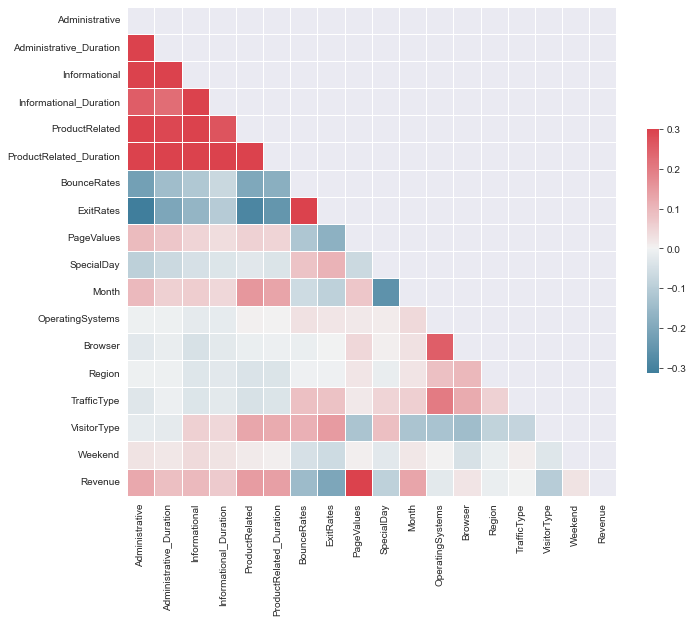

In [18]:
import seaborn as sns
mask = np.triu(np.ones_like(data_encoded.corr()
                            , dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 10, as_cmap=True)

sns.heatmap(data_encoded.corr()
            , mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
data.corr()[(1.0>data.corr()) & (abs(data.corr())>0.3)].stack()

Administrative           Administrative_Duration    0.591798
                         Informational              0.375070
                         ProductRelated             0.432604
                         ProductRelated_Duration    0.372136
                         ExitRates                 -0.313816
Administrative_Duration  Administrative             0.591798
                         ProductRelated_Duration    0.356483
Informational            Administrative             0.375070
                         Informational_Duration     0.615074
                         ProductRelated             0.364077
                         ProductRelated_Duration    0.374700
Informational_Duration   Informational              0.615074
                         ProductRelated_Duration    0.329028
ProductRelated           Administrative             0.432604
                         Informational              0.364077
                         ProductRelated_Duration    0.856915
ProductRelated_Duration 

correlation > 0.85

In [15]:
data.corr()[(1.0>data.corr()) & (abs(data.corr())>0.85)].stack()

ProductRelated           ProductRelated_Duration    0.856915
ProductRelated_Duration  ProductRelated             0.856915
BounceRates              ExitRates                  0.911491
ExitRates                BounceRates                0.911491
dtype: float64

histogramms

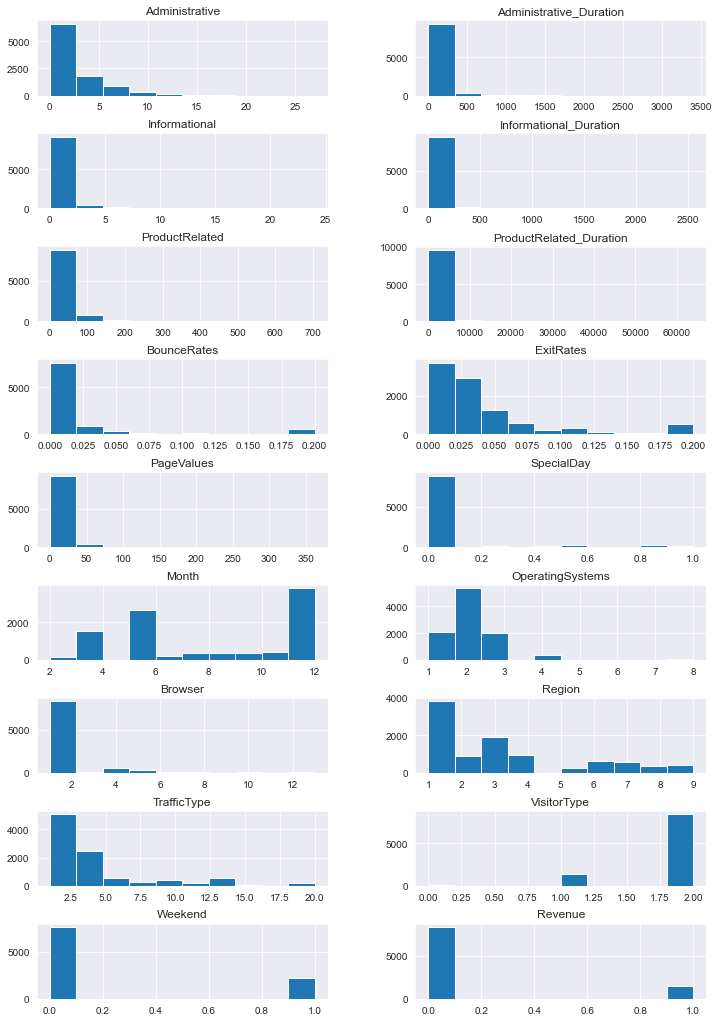

In [21]:
from matplotlib import pyplot as plt

data_encoded.hist(figsize=(12,18), layout=(9, 2),bins=10)
plt.subplots_adjust(hspace=0.5)

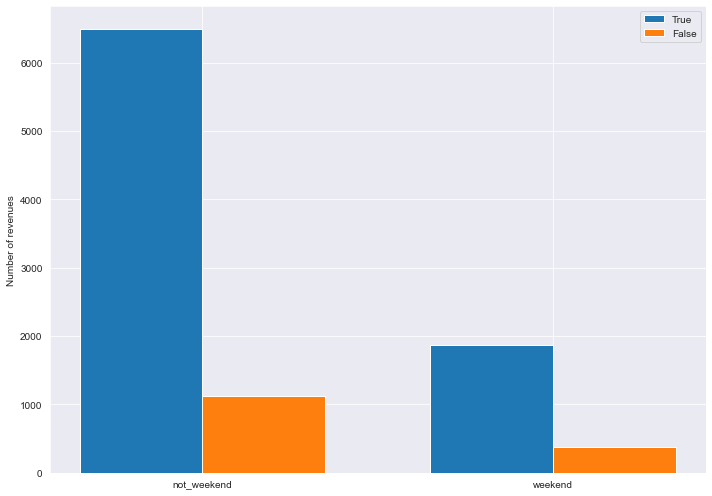

In [14]:
grouped = data_encoded.groupby(by=["Weekend","Revenue"]).size()
labels = ['not_weekend', 'weekend']
notweekend = [grouped[0][0], grouped[1][0]]
weekend = [grouped[0][1], grouped[1][1]]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, notweekend, width, label='True')
rects2 = ax.bar(x + width/2, weekend, width, label='False')

ax.set_ylabel('Number of revenues')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

outliers (in columns Informational, Informational_Duration, PageValues, SpecialDay(i delated it from fun idk if we should remove outliers from it) after the transformation all records have value 0, not sure what to do with it, we can either remove columns because they do not have any info anymore, or not remove outliers from them at all)

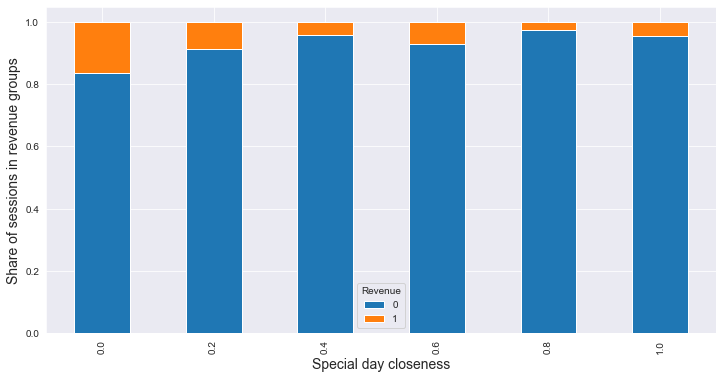

In [12]:
data_encoded.groupby('SpecialDay')["Revenue"].value_counts(normalize=True).unstack('Revenue').plot.bar(stacked=True, figsize = (12, 6))
plt.xlabel("Special day closeness", fontsize=12)
plt.ylabel("Division of sessions", fontsize=12)
plt.show()

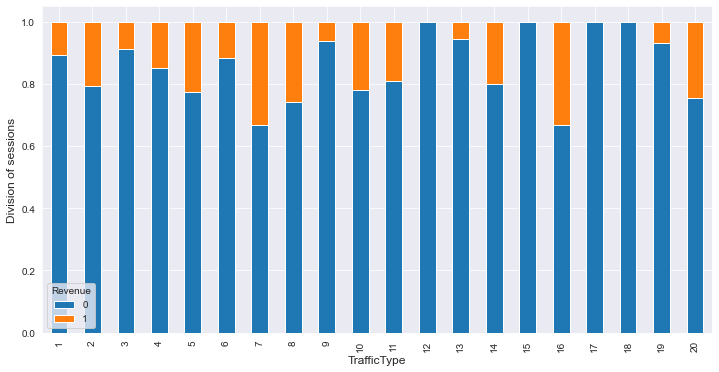

In [16]:
data_encoded.groupby('TrafficType')["Revenue"].value_counts(normalize=True).unstack('Revenue').plot.bar(stacked=True,
                                                                                                       figsize=(12, 6))
plt.xlabel("TrafficType", fontsize=12)
plt.ylabel("Division of sessions", fontsize=12)
plt.show()

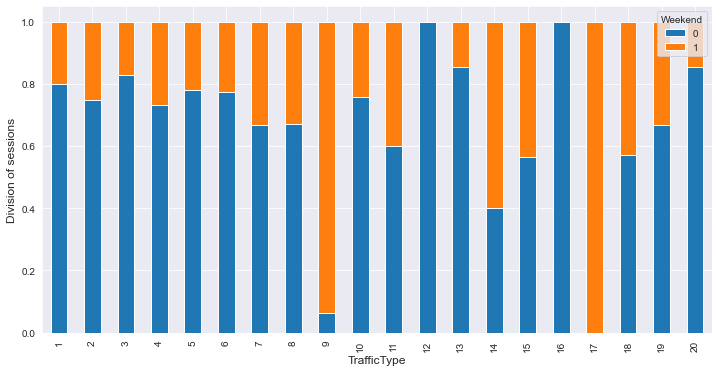

In [26]:
data_encoded.groupby('TrafficType')["Weekend"].value_counts(normalize=True).unstack('Weekend').plot.bar(stacked=True,
                                                                                                        figsize=(12, 6))
plt.xlabel("TrafficType", fontsize=12)
plt.ylabel("Division of sessions", fontsize=12)
plt.show()

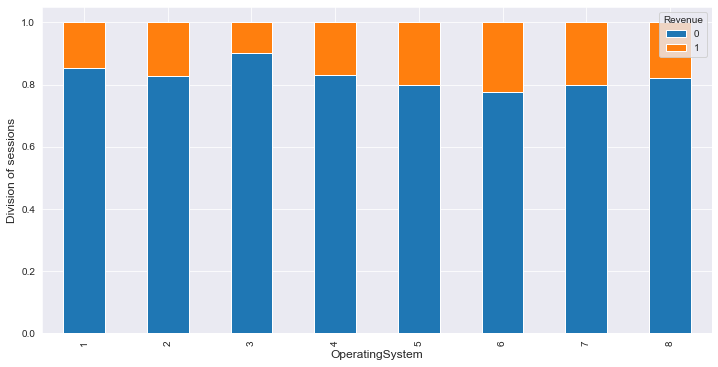

In [18]:
data_encoded.groupby('OperatingSystems')["Revenue"].value_counts(normalize=True).unstack('Revenue').plot.bar(stacked=True,
                                                                                                        figsize=(12, 6))
plt.xlabel("OperatingSystem", fontsize=12)
plt.ylabel("Division of sessions", fontsize=12)
plt.show()

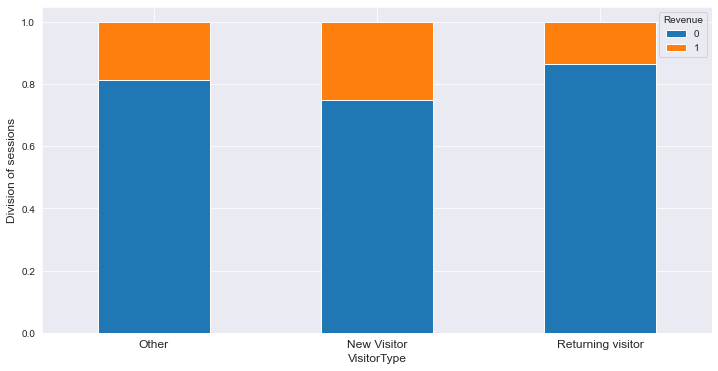

In [24]:
labels=['Other','New Visitor','Returning visitor']
plv=data_encoded.groupby('VisitorType')["Revenue"].value_counts(normalize=True).unstack('Revenue').plot.bar(stacked=True,figsize=(12, 6))
plt.xlabel("VisitorType", fontsize=12)
plt.ylabel("Division of sessions", fontsize=12)
plv.set_xticklabels(labels, rotation=0, fontsize=12)  # Set custom labels

plt.show()

In [169]:
def outliers_repl(data):
    for col in [ 'Administrative',    'Administrative_Duration',    
                'Informational',    'Informational_Duration',    'ProductRelated',    
                'ProductRelated_Duration',    'BounceRates',    'ExitRates',    
                'PageValues']:
        q1, q3 = np.percentile(data[col], [25, 75])
        IQR = q3 - q1
        l_bound = q1 - 1.5 * IQR
        u_bound = q3 + 1.5 * IQR
        m1 = (data[col] < l_bound)
        if m1.any():
            print(f"Outliers removed from {col}: Lower Bound = {l_bound}")
            data.loc[m1, col] = l_bound
        m2 = (data[col] > u_bound)
        if m2.any():
            print(f"Outliers removed from {col}: Upper Bound = {u_bound}")
            data.loc[m2, col] = u_bound
    return data

In [170]:
data_encoded=outliers_repl(data_encoded)

Outliers removed from Administrative: Upper Bound = 10.0
Outliers removed from Administrative_Duration: Upper Bound = 230.0
Outliers removed from Informational: Upper Bound = 0.0
Outliers removed from Informational_Duration: Upper Bound = 0.0
Outliers removed from ProductRelated: Upper Bound = 82.0
Outliers removed from ProductRelated_Duration: Upper Bound = 3398.97395875
Outliers removed from BounceRates: Upper Bound = 0.041666667500000004
Outliers removed from ExitRates: Upper Bound = 0.103571429
Outliers removed from PageValues: Upper Bound = 0.0


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import seaborn as sns

In [20]:
def metrics_plots(max_k=10):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(data_encoded)
        # Calculate cluster validation metrics and append to lists of metrics
        score.append(kmeans.score(data_encoded, predictions))
        score_kmeans_s.append(silhouette_score(data_encoded, kmeans.labels_, metric='euclidean'))
        score_kmeans_c.append(calinski_harabasz_score(data_encoded, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(data_encoded, predictions))

    list_scores = [score, score_kmeans_s, score_kmeans_c, score_kmeans_d]
    # Elbow Method plot
    list_title = ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin']
    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        plt.plot(x_ticks, list_scores[i], 'bx-')
        plt.xlabel('k')
        plt.ylabel(list_title[i])
        plt.title('Optimal k')
        plt.show()

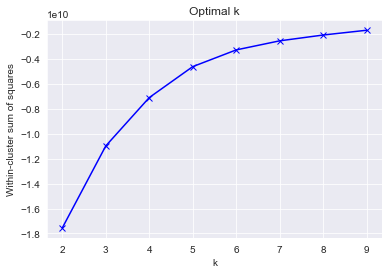

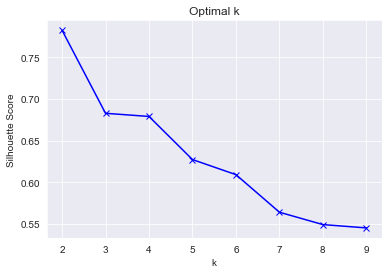

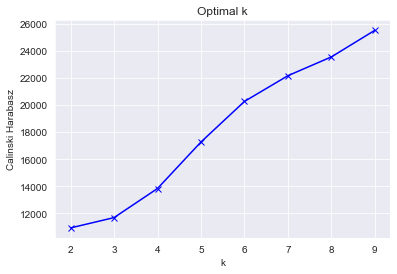

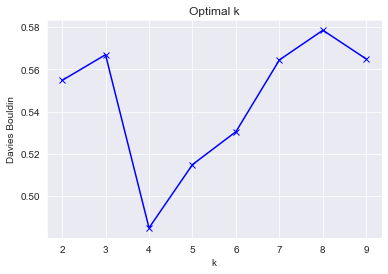

In [33]:
metrics_plots(max_k=10)


In [34]:
kmeans1=KMeans(n_clusters=4).fit(data_encoded)



In [35]:
y_kmeans = kmeans1.predict(data_encoded)

In [39]:
data_encoded['clusterkm']=y_kmeans

In [53]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   int32  
 11  OperatingSystems         9864 non-null   int64  
 12  Browser                  9864 non-null   int64  
 13  Region                   9864 non-null   int64  
 14  TrafficType             

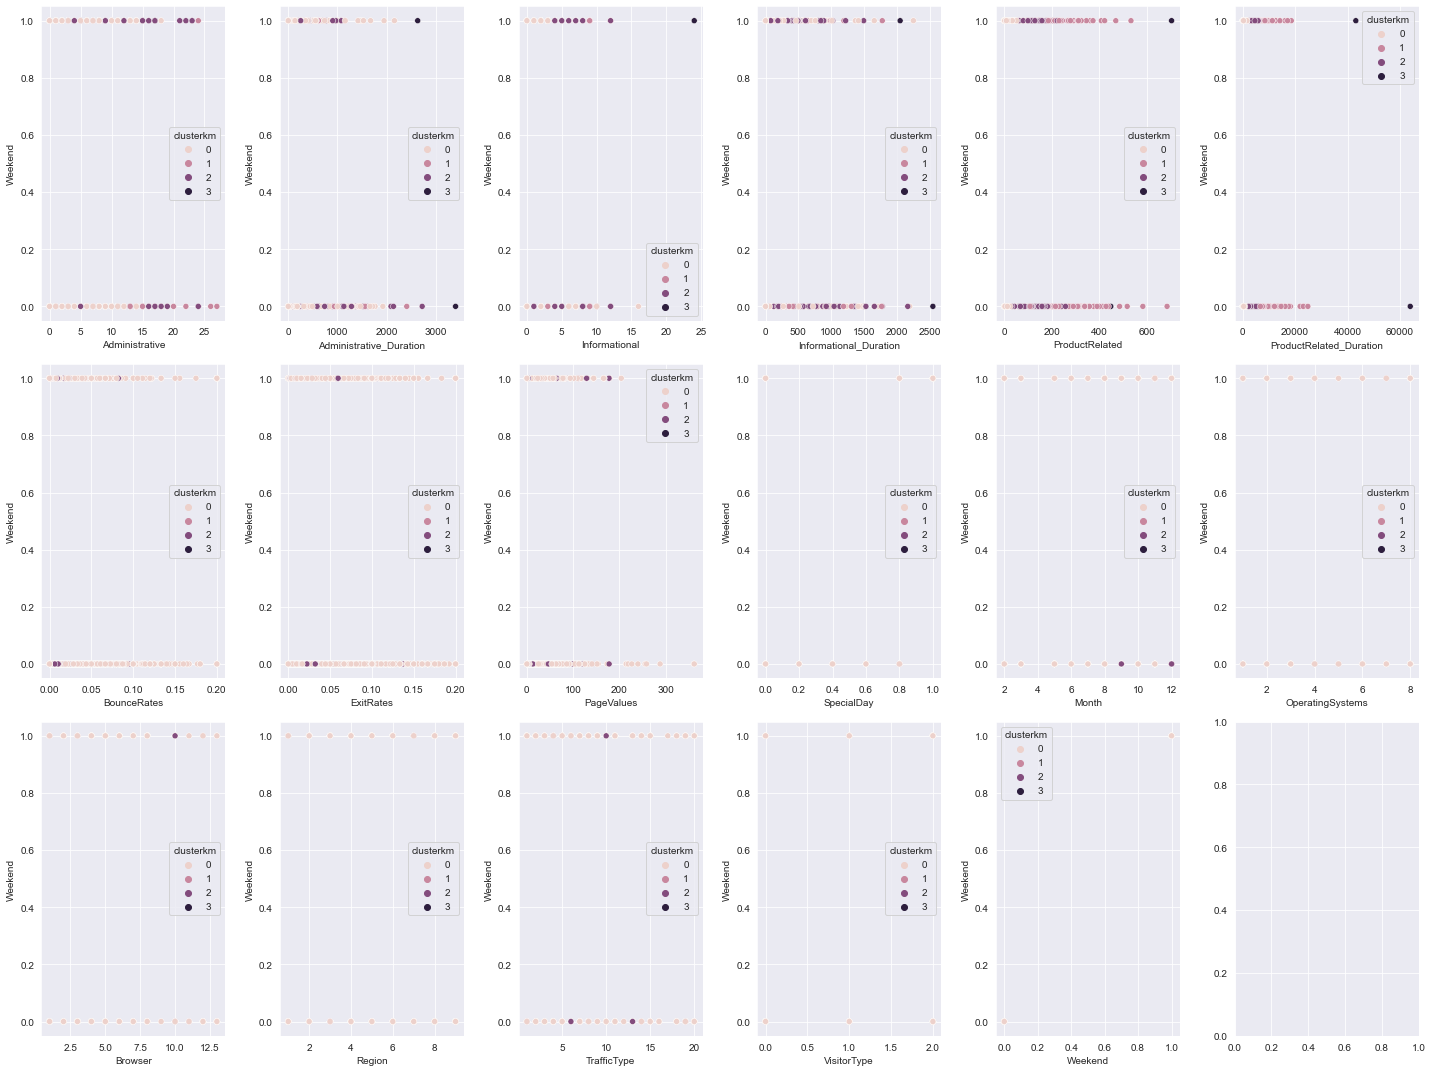

In [54]:
fig, axs = plt.subplots(3,6, figsize=(20,15))
axs = axs.flatten()
for i,col in enumerate(data_encoded.columns[0:17]):
    
    sns.scatterplot(data=data_encoded,x=col,y="Weekend",hue="clusterkm",ax=axs[i])
plt.tight_layout()

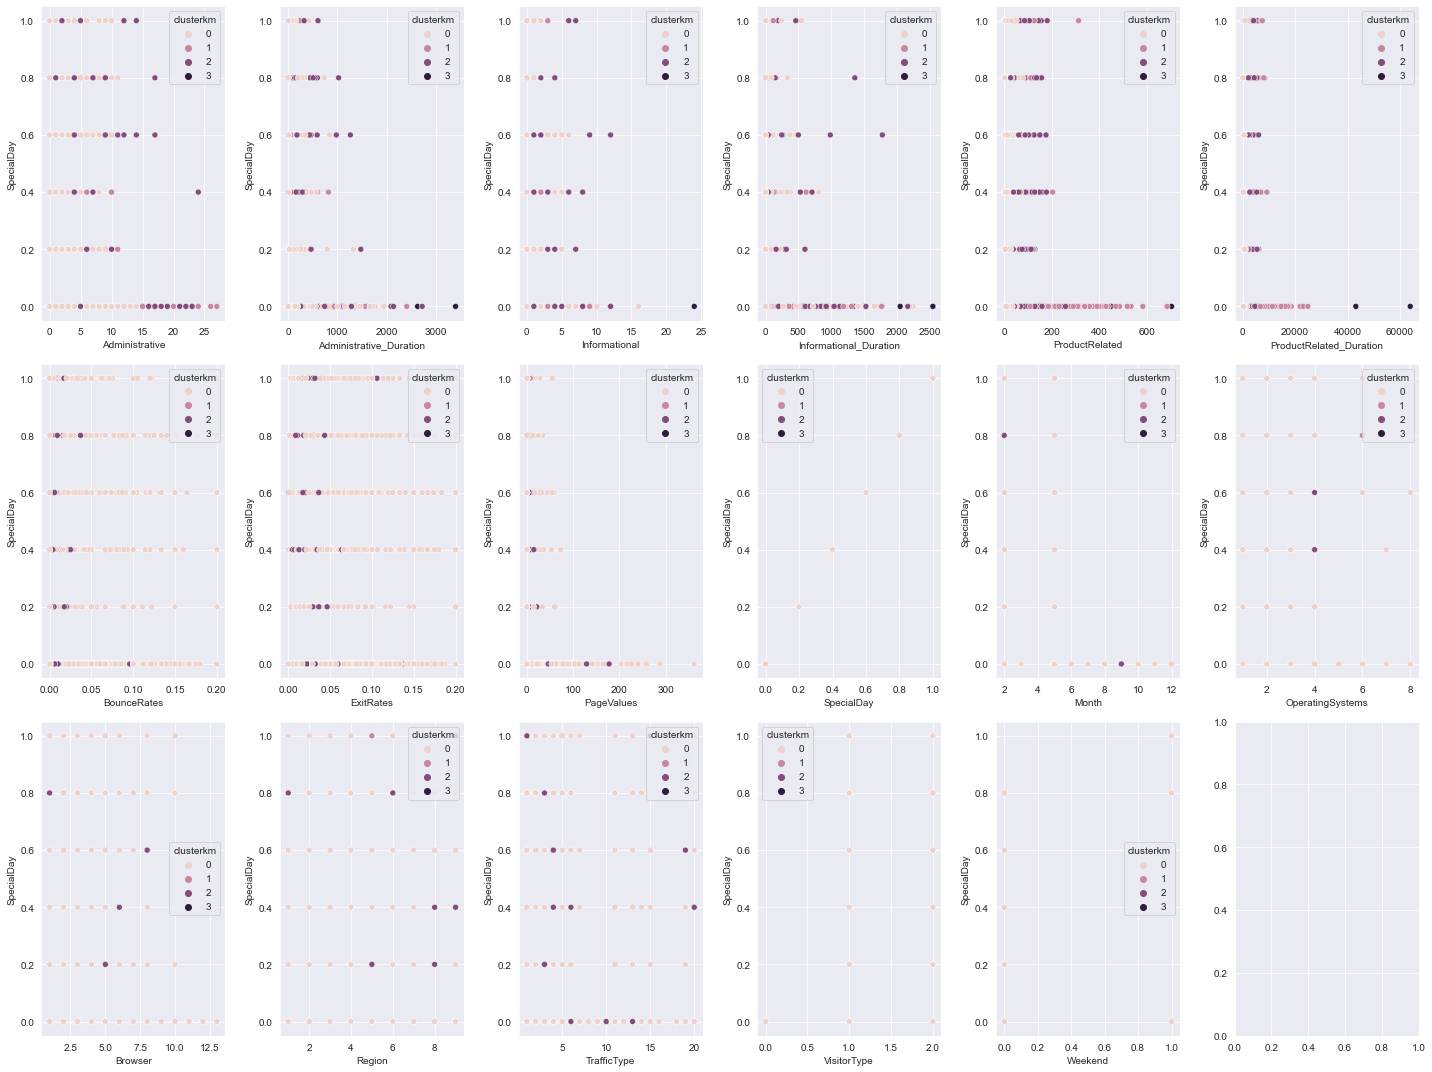

In [55]:
fig, axs = plt.subplots(3,6, figsize=(20,15))
axs = axs.flatten()
for i,col in enumerate(data_encoded.columns[0:17]):

    sns.scatterplot(data=data_encoded,x=col,y="SpecialDay",hue="clusterkm",ax=axs[i])
plt.tight_layout()